# Lab 1 - Descriptive Statistics

## Question 1

In [1]:
dt <- read.csv("mousedeer.csv")
head(dt)

,Length,Species
,<dbl>,<chr>
1,46.6,Philippine mouse-deer
2,44.8,Philippine mouse-deer
3,44.7,Philippine mouse-deer
4,48.4,Philippine mouse-deer
5,47.3,Philippine mouse-deer
6,48.8,Philippine mouse-deer


In [8]:
summary(dt)
table(dt$Species)

     Length        Species         
 Min.   :40.00   Length:60         
 1st Qu.:45.33   Class :character  
 Median :47.55   Mode  :character  
 Mean   :48.63                     
 3rd Qu.:52.98                     
 Max.   :56.30                     


   Greater mouse-deer     Lesser mouse-deer Philippine mouse-deer 
                   20                    20                    20 

We have successfully imported the dataset (n = 60), and checked the Species column. We got three values in this column, each of them has 20 cases.

## Question 2

- This data set is a sample, instead of population. Population is the entire group we want to draw conclusion of, while sample is a limited dataset generated by certain sampling strategies to represent the population. 
- In this case, population refers to all the deers in the nature which can be categorized into 3 types (Greater, Lesser and Philippine). We want to use this sample set to make inference or conclusions about the population.

## Question 3

- Length is a ratio variable, having continuous values. Species is a nominal variables, having 3 discrete and non-number values.
- Measurement levels of variables are important, because this determines the choices of methods of coding, analyzing and visualizing. For example, we cannot calculating the correlation effect between a nominal variable and a ratio variable, while we can use a cross table to see their potential association. Another example is that we cannot use boxplot to visualize a nominal variable.


## Question 4

In [ ]:
table(dt$Species) # frequencies
prop.table(table(dt$Species)) # proportions


   Greater mouse-deer     Lesser mouse-deer Philippine mouse-deer 
                   20                    20                    20 


   Greater mouse-deer     Lesser mouse-deer Philippine mouse-deer 
            0.3333333             0.3333333             0.3333333 

## Question 5 and 6

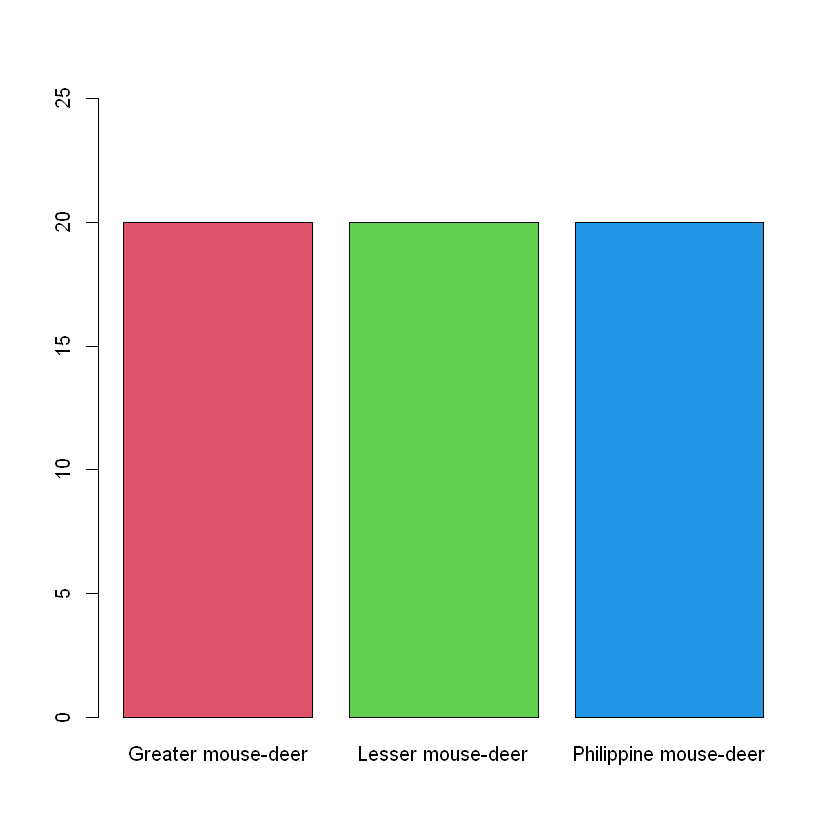

In [17]:
barplot(table(dt$Species), col = c(2,3,4), ylim = c(0, 25))

- As can be seen in the figure, as well as the frequencies table, there's no mode in Species column, as all the three values have the same frequencies (f = 20).
- The barplot is consistent with the frequencies table.

## Question 7

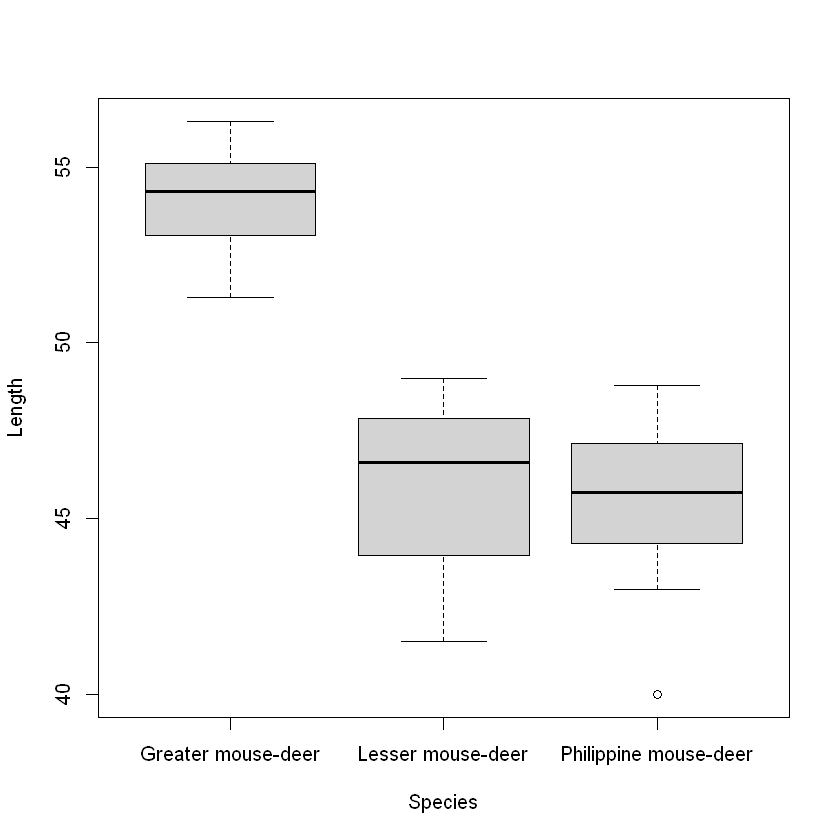

In [20]:
boxplot(dt$Length ~ dt$Species, xlab = "Species", ylab = "Length")

## Question 8

Yes there are several patterns:
- the mean value and the general distribution of Greater are significantly larger than the other two species.
- Lesser is more dispersed (regarding the 25/75 IQR and the 10/90 IQR) than the other two species. Greater seems to be the least dispersed group.
- There's an outlier case in Philippine group.

## Question 9

In [34]:
Philippine <- dt[dt$Species == "Philippine mouse-deer",]$Length
Lesser <- dt[dt$Species == "Lesser mouse-deer",]$Length
Greater <- dt[dt$Species == "Greater mouse-deer",]$Length

# design a function to find all the outliers of a variable
Find_Outliers <- function(x){
    qrs <- quantile(x, c(0.25, 0.75))
    iqr <- qrs[2] - qrs[1]
    lower_bound <- mean(x) - 1.5*iqr
    upper_bound <- mean(x) + 1.5*iqr
    outliers <- x[x < lower_bound | x > upper_bound]
    if(length(outliers) > 0){
        return(outliers)
    }
    return("No outliers")
}

In [35]:
Find_Outliers(Greater)
Find_Outliers(Lesser)
Find_Outliers(Philippine)

[1] "No outliers"

[1] "No outliers"

[1] 40

So yes, thers's an outlier in Philippine group, which is 40.

## Question 10

I guess it's between 46 and 47. But let's see:

In [36]:
median(Lesser)

[1] 46.6

Aha! I got it right.

## Question 11

In [37]:
quantile(Greater, 0.75)

75% 
 55

They are above 55 centimeters, three times as my height, that's crazy.

## Question 12

In [39]:
summary(dt$Length)
sd(dt$Length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.00   45.33   47.55   48.63   52.98   56.30 

[1] 4.355547

My interpretation:
- Mean value is slightly larger than the median value, which means the distribution of Length is slightly skewed to the right (more flat in the right end)
- approximately 68% of the sample is between 44 and 53 (mean +- 1 * sd)
- There's no case outside the mean +- 2 * sd interval

## Question 13 and 14

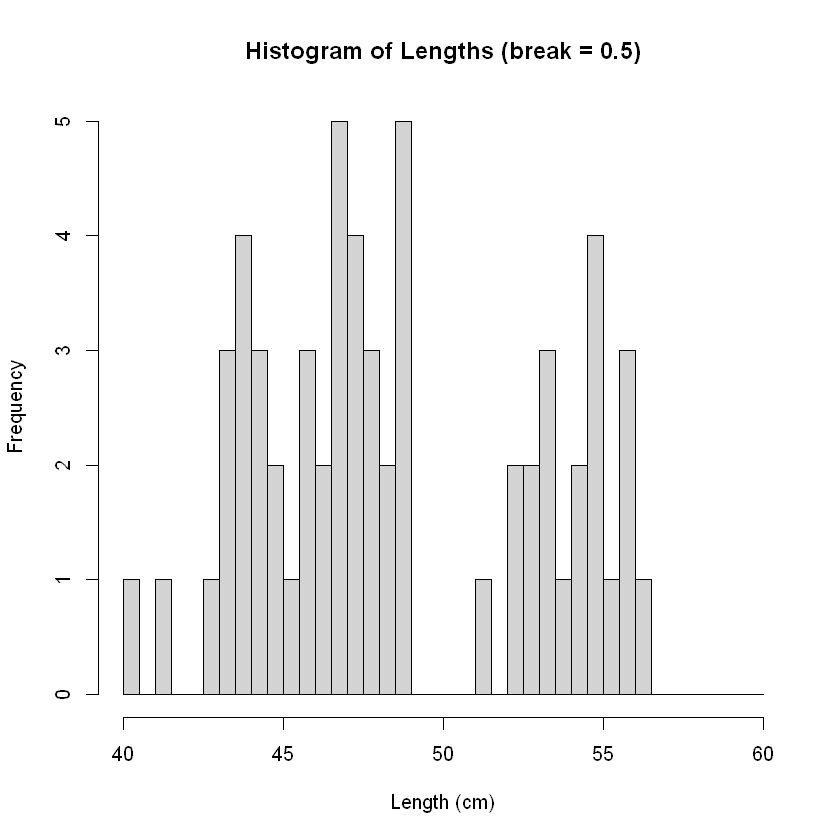

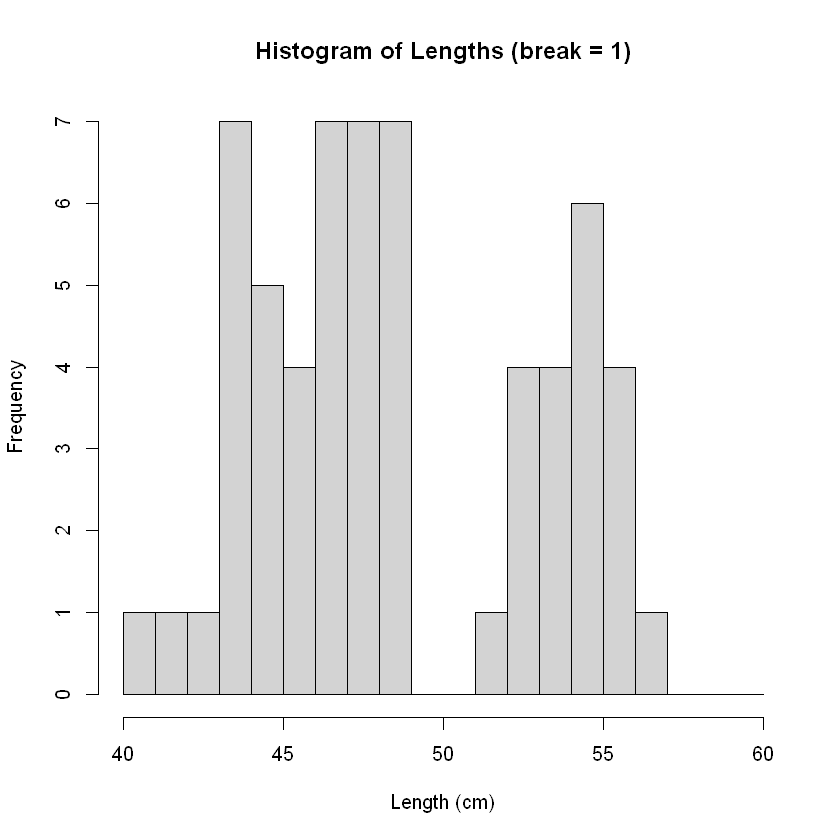

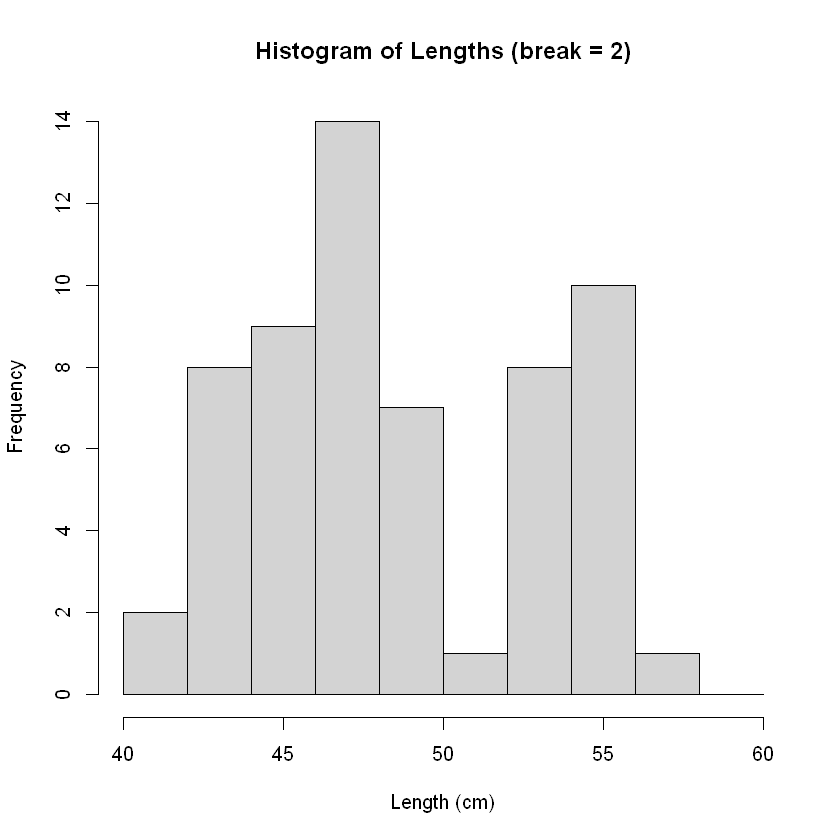

In [55]:
hist(dt$Length, breaks = seq(40, 60, 0.5),
    main = "Histogram of Lengths (break = 0.5)",
    xlab = "Length (cm)", 
    xlim = c(40, 60))
hist(dt$Length, breaks = seq(40, 60, 1),
    main = "Histogram of Lengths (break = 1)",
    xlab = "Length (cm)", 
    xlim = c(40, 60))
hist(dt$Length, breaks = seq(40, 60, 2),
    main = "Histogram of Lengths (break = 2)",
    xlab = "Length (cm)", 
    xlim = c(40, 60))

## Question 15

- If we set the break as 1 or smaller, it's obviously multimodal. But if we set the break as 2, the first two peaks seem to be merged into 1, so it would be like a bimodal distribution.
- I would say it's right-skewed (more pronounced in the right end) if I have to. But I think it would be more meaningful to observe the histogram of each specie.

Here's the evidence that there're more than 2 subgroups in the dataset:

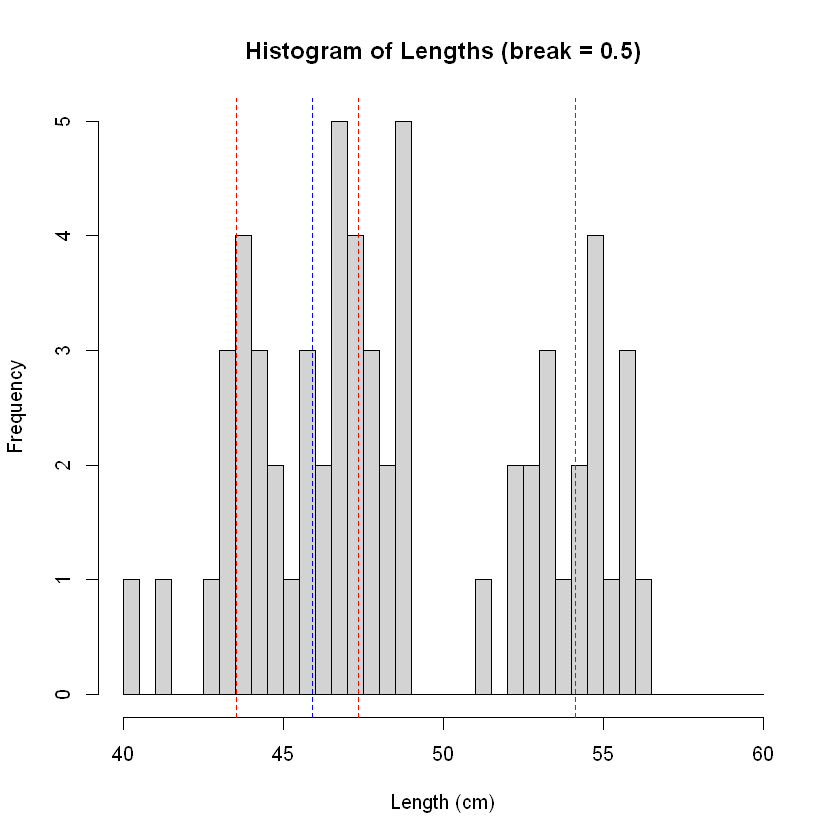

In [62]:
clus_2 <- kmeans(dt$Length, centers = 2, nstart = 5)
clus_3 <- kmeans(dt$Length, centers = 3, nstart = 5)

hist(dt$Length, breaks = seq(40, 60, 0.5),
    main = "Histogram of Lengths (break = 0.5)",
    xlab = "Length (cm)", 
    xlim = c(40, 60))

abline(v = clus_2$centers, col = "blue", lty = 2)
abline(v = clus_3$centers, col = "red", lty = 2)

As can be seen in the figure above, red lines are centers of 3 clusters generated by k_means, and blue lines are centers of 2 clusters generated by k_means. Obviously, when we set the number of clusters as 3, the centers generated are more consistent with the peaks of actual distribution (When there are only 2 clusters, one of the centers falls in the trough of the distribution instead of the peaks). Therefore, there are 3 subgroups, instead of 2, in this variable.

## Question 16

In [51]:
dt$LengthInches <- 0.393701 * dt$Length 
summary(dt$LengthInches)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.75   17.84   18.72   19.15   20.86   22.17 

## Question 17

In [67]:
# We have two methods to generate a subset

# method 1
mousedeer_long <- subset(dt, subset = dt$Length > median(dt$Length))
summary(mousedeer_long)

# method 2
mousedeer_long <- dt[dt$Length > median(dt$Length),]
summary(mousedeer_long)

     Length        Species           LengthInches  
 Min.   :47.60   Length:30          Min.   :18.74  
 1st Qu.:49.00   Class :character   1st Qu.:19.29  
 Median :53.05   Mode  :character   Median :20.89  
 Mean   :52.22                      Mean   :20.56  
 3rd Qu.:54.77                      3rd Qu.:21.56  
 Max.   :56.30                      Max.   :22.17  

     Length        Species           LengthInches  
 Min.   :47.60   Length:30          Min.   :18.74  
 1st Qu.:49.00   Class :character   1st Qu.:19.29  
 Median :53.05   Mode  :character   Median :20.89  
 Mean   :52.22                      Mean   :20.56  
 3rd Qu.:54.77                      3rd Qu.:21.56  
 Max.   :56.30                      Max.   :22.17  

In [68]:
write.csv(mousedeer_long, "mousedeer_long.csv", row.names = FALSE)